<div align=center>

<font size=5>
    In the Name of God
<font/>
<br/>
<br/>
<font>
    Sharif University of Technology - Departmenet of Electrical Engineering
</font>
<br/>
<font>
    Introducing with Machine Learing - Dr. S. Amini
</font>
<br/>
<br/>
Spring 2023

</div>

<hr/>
<div align=center>
<font size=6>
    Neural Networks Practical Assignment
    
    Question 2
</font>
<br/>		
<font size=4>
<br/>
</div>

# Personal Data

In [2]:
# Set your student number
student_number = 99101179
Name = 'Mohammad Amin'
Last_Name = 'Eghlimi'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**.  

- Collaboration and using the internet is allowed, but your code **must be written by yourself**. **Copying code** from each other or from available resources will result in a **zero score for the assignment**.

- In this question, you are allowed to use `torch.optim`, `torch.nn` or any other submodule you need.
- You **are not allowed** to use the models already implemented or the pretrained models in torch. 

In [3]:
!pip install numpy
!pip install matplotlib
!pip install torchvision
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importing Libraries

In [4]:
import torch
from torchvision.datasets import FashionMNIST
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np
from matplotlib import pyplot as plt
from typing import Dict

## Datasets and Dataloaders

You should load the train and test set of the `CIFAR10` dataset and apply the desired transforms on it. Then, you should create the loaders for these `test` and `train` sets.
- **Hint:** You can use `torchvision.datasets` to easily load the CIFAR10 dataset.

In [5]:
## FILL HERE
#My libs XD
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CIFAR10

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

transform = transforms.Compose([transforms.ToTensor()])

train_data = CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_data = CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64,
                                          shuffle=True)

test_loader = DataLoader(test_data, batch_size=64,
                                         shuffle=False)


100%|██████████| 170498071/170498071 [00:05<00:00, 29431491.98it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Visualization

Visualize 1 random image from each class


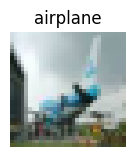

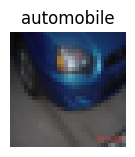

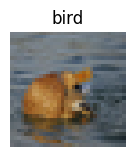

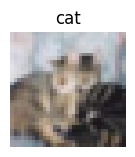

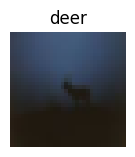

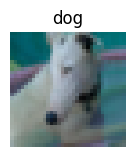

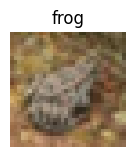

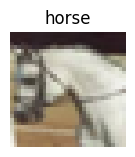

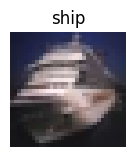

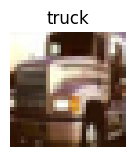

In [6]:
import random

class_labels = train_data.classes

# Function to show an image
def show_image(image, label):
    fig, ax = plt.subplots(1, 1, figsize=(3,1.5))
    image = image.permute(1, 2, 0) 
    ax.imshow(image)
    ax.set_title(class_labels[label])
    ax.axis('off')
    plt.show()

for i, label in enumerate(class_labels):
    # Collect all indices of the current class
    class_indices = [idx for idx, (_, image_label) in enumerate(train_data) if image_label == i]
    
    # Randomly select one index from the class
    random_index = random.choice(class_indices)
    random_image, _ = train_data[random_index]
    
    show_image(random_image, i)


## Defining a Convolutional Neural Network

In this section, you should define a class called `Net` which represents the model for your convolutional neural network.
- **Hint:** You can use `torch.nn` to add the required layers to your model.

In [7]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        ## FILL HERE
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)
    def forward(self, x):
        ## FILL HERE
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x

net = Net()

## Define a Loss function and optimizer

In this section, you simply define your loss function and optimizer.
- **Hint:** You can use `torch.optim` and implemented loss functions in torch.

In [8]:
## FILL HERE
import torch.optim as optim

loss_fun = nn.CrossEntropyLoss()

optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

## Training the model

You should train your model for multiple epochs. You are free to choose the number of epochs. However, you should reach an acceptable accuracy at the end.

In [9]:
epoch_nums = 16 ## Number of epochs
for epoch in range(epoch_nums):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        ## FILL HERE
        ## You should train the model and also print the running loss for each batch
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = loss_fun(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {loss.item():.3f}")

    average_loss = running_loss / len(train_loader)
    print(f"\n[Epoch {epoch+1}] Average loss: {average_loss:.3f}\n\n")
print('Finished Training')

Streaming output truncated to the last 5000 lines.
[Epoch 10, Batch 504] loss: 1.336
[Epoch 10, Batch 505] loss: 1.432
[Epoch 10, Batch 506] loss: 1.271
[Epoch 10, Batch 507] loss: 1.253
[Epoch 10, Batch 508] loss: 1.543
[Epoch 10, Batch 509] loss: 1.321
[Epoch 10, Batch 510] loss: 1.396
[Epoch 10, Batch 511] loss: 1.639
[Epoch 10, Batch 512] loss: 1.491
[Epoch 10, Batch 513] loss: 1.222
[Epoch 10, Batch 514] loss: 1.256
[Epoch 10, Batch 515] loss: 1.588
[Epoch 10, Batch 516] loss: 1.419
[Epoch 10, Batch 517] loss: 1.344
[Epoch 10, Batch 518] loss: 1.129
[Epoch 10, Batch 519] loss: 1.564
[Epoch 10, Batch 520] loss: 1.415
[Epoch 10, Batch 521] loss: 1.540
[Epoch 10, Batch 522] loss: 1.338
[Epoch 10, Batch 523] loss: 1.818
[Epoch 10, Batch 524] loss: 1.404
[Epoch 10, Batch 525] loss: 1.568
[Epoch 10, Batch 526] loss: 1.419
[Epoch 10, Batch 527] loss: 1.410
[Epoch 10, Batch 528] loss: 1.347
[Epoch 10, Batch 529] loss: 1.252
[Epoch 10, Batch 530] loss: 1.422
[Epoch 10, Batch 531] loss: 1.6

## Test the network on the test data

In the following section, you should test your network and calculate the accuracy of your model on the test dataset.

In [10]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        ## FILL HERE
        inputs, labels = data
        
        outputs = net(inputs)

        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)

        correct += (predicted == labels).sum().item()
print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


Here, we also calculate the model performance for each class as well.

In [11]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in class_labels}
total_pred = {classname: 0 for classname in class_labels}

# again no gradients needed
with torch.no_grad():
    for data in test_loader:
        ## FILL HERE
        inputs, labels = data

        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)

        # Update the counts for each class
        for label, prediction in zip(labels, predicted):
            if label == prediction:
                correct_pred[class_labels[label]] += 1
            total_pred[class_labels[label]] += 1

# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: airplane is 69.1 %
Accuracy for class: automobile is 72.8 %
Accuracy for class: bird  is 28.0 %
Accuracy for class: cat   is 30.9 %
Accuracy for class: deer  is 59.6 %
Accuracy for class: dog   is 47.5 %
Accuracy for class: frog  is 64.1 %
Accuracy for class: horse is 75.9 %
Accuracy for class: ship  is 50.5 %
Accuracy for class: truck is 58.4 %
